In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.6.0


In [2]:
df = pd.read_pickle('bpm_big_data_shift4.plk') 
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,...,B605PH_std,B605PV_std,B609PH_std,B609PV_std,B610PH_std,B610PV_std,B612PH_std,B612PV_std,B613PH_std,B613PV_std
0,250,50,0.0,0.0,Upstream,300,0.327720,0.371527,0.292497,0.362120,...,171.509558,181.900762,158.908857,140.592316,151.740905,146.828236,226.647387,245.910795,154.785258,166.431234
1,250,50,0.0,0.0,Upstream,300,0.311771,0.356898,0.274921,0.342156,...,169.830697,216.475140,149.517695,142.558361,194.306958,157.963311,194.643836,192.405427,160.568958,138.940992
2,250,50,0.0,0.0,Upstream,300,0.336448,0.388673,0.301275,0.368691,...,220.313357,161.436996,166.954946,115.122176,174.017122,168.100156,247.267401,188.196305,173.494629,159.973436
3,250,50,0.0,0.0,Upstream,300,0.312761,0.369008,0.304187,0.367516,...,188.036476,197.883136,167.412521,123.291434,196.146067,138.611335,197.914373,200.568075,188.845954,157.322576
4,250,50,0.0,0.0,Upstream,300,0.312109,0.375567,0.310179,0.377982,...,187.096749,187.556606,154.283859,106.170747,154.124673,144.756091,228.785693,211.103056,190.272829,153.553488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,250,1,0.0,-1.0,Downstream,300,0.164531,0.213478,0.194903,0.181066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11996,250,1,0.0,-1.0,Downstream,300,0.150945,0.206443,0.184874,0.175678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11997,250,1,0.0,-1.0,Downstream,300,0.144606,0.196726,0.178423,0.168635,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11998,250,1,0.0,-1.0,Downstream,300,0.144625,0.196734,0.177356,0.169459,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
df = df[df.bunch_charge == 250]
df = df[df.num_bunches == 50]
df = df[df.V125 == 1.0]
df = df[df.connection == 'Upstream']
df = df[df.H125 == 0.0]
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,...,B605PH_std,B605PV_std,B609PH_std,B609PV_std,B610PH_std,B610PV_std,B612PH_std,B612PV_std,B613PH_std,B613PV_std
4800,250,50,1.0,0.0,Upstream,300,0.603586,0.698447,0.457090,0.637624,...,153.686935,216.685123,178.293184,128.296394,210.107743,161.855308,233.616772,247.798873,214.175938,177.881172
4801,250,50,1.0,0.0,Upstream,300,0.616917,0.711661,0.457162,0.644258,...,242.315763,192.201129,160.881833,131.428664,188.504610,176.278344,272.455825,223.308467,185.835897,177.858728
4802,250,50,1.0,0.0,Upstream,300,0.595809,0.683513,0.427979,0.623582,...,207.311331,172.770762,195.607407,100.580230,179.948657,149.107440,224.380217,241.910976,206.903487,144.048426
4803,250,50,1.0,0.0,Upstream,300,0.610222,0.699068,0.439910,0.633302,...,163.378983,215.534730,158.350874,119.294623,168.995930,176.945718,225.675299,190.870303,170.182544,152.709299
4804,250,50,1.0,0.0,Upstream,300,0.625563,0.718061,0.455259,0.652855,...,203.414041,172.204091,179.440564,143.076606,202.705534,171.373554,213.271692,197.475623,159.617027,162.035733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,250,50,1.0,0.0,Upstream,300,0.618713,0.698679,0.457700,0.644570,...,204.522069,205.703508,190.954049,128.265563,166.317003,148.291087,206.049154,254.135303,196.956521,191.751644
5096,250,50,1.0,0.0,Upstream,300,0.602116,0.697928,0.447825,0.639325,...,174.838964,206.690918,194.845669,125.891556,176.812927,161.807347,240.015878,212.325522,213.478795,177.920228
5097,250,50,1.0,0.0,Upstream,300,0.586796,0.664775,0.429804,0.611682,...,222.904025,191.562493,192.344713,133.826747,182.693322,144.054325,241.532171,182.624491,187.991856,163.030677
5098,250,50,1.0,0.0,Upstream,300,0.612639,0.706315,0.462283,0.651420,...,223.250411,209.415380,177.353198,143.045710,165.013377,148.982023,241.534010,231.427623,209.791944,162.339658


In [4]:
# Define variable to predict
output = 'B441PV_std'

df = df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', output]]
df

,C1,C2,C3,C4,C5,C6,C7,C8,B441PV_std
4800,0.603586,0.698447,0.457090,0.637624,0.688142,0.265139,0.215845,0.350201,339.908844
4801,0.616917,0.711661,0.457162,0.644258,0.684961,0.265854,0.217353,0.349614,329.321140
4802,0.595809,0.683513,0.427979,0.623582,0.665539,0.259983,0.213750,0.338141,331.852754
4803,0.610222,0.699068,0.439910,0.633302,0.679876,0.264674,0.215546,0.344791,326.123924
4804,0.625563,0.718061,0.455259,0.652855,0.695866,0.271358,0.220574,0.355660,299.057249
...,...,...,...,...,...,...,...,...,...
5095,0.618713,0.698679,0.457700,0.644570,0.699183,0.268549,0.223929,0.359092,339.766255
5096,0.602116,0.697928,0.447825,0.639325,0.681140,0.265744,0.216323,0.346258,266.296242
5097,0.586796,0.664775,0.429804,0.611682,0.668462,0.255245,0.209495,0.340244,356.208224
5098,0.612639,0.706315,0.462283,0.651420,0.697175,0.272869,0.223990,0.358250,295.058398


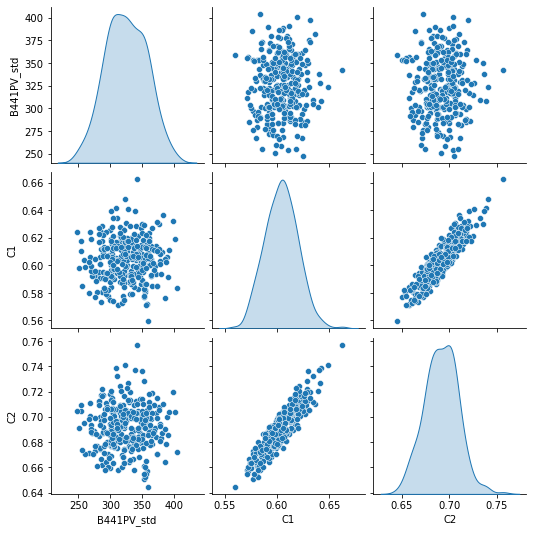

In [6]:
sns.pairplot(df[[output, 'C1', 'C2']], diag_kind='kde') # Just plot some relationships

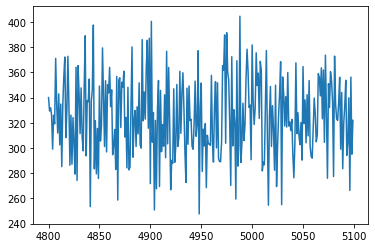

In [7]:
plt.plot(df[output])

In [8]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 5008 to 4857
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   C1          240 non-null    float64
 1   C2          240 non-null    float64
 2   C3          240 non-null    float64
 3   C4          240 non-null    float64
 4   C5          240 non-null    float64
 5   C6          240 non-null    float64
 6   C7          240 non-null    float64
 7   C8          240 non-null    float64
 8   B441PV_std  240 non-null    float64
dtypes: float64(9)
memory usage: 18.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 4801 to 5089
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   C1          60 non-null     float64
 1   C2          60 non-null     float64
 2   C3          60 non-null     float64
 3   C4          60 non-null     float64
 4   C5          60 non-null     float64
 5   C

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
C1,240.0,0.604215,0.015138,0.571938,0.592746,0.604612,0.613858,0.662376
C2,240.0,0.691694,0.017277,0.650954,0.680094,0.691897,0.703678,0.756896
C3,240.0,0.447347,0.014038,0.409401,0.437956,0.447060,0.455924,0.485743
C4,240.0,0.633153,0.014350,0.599391,0.623417,0.633272,0.641964,0.685687
C5,240.0,0.681971,0.015377,0.643003,0.672927,0.681652,0.690603,0.734674
C6,240.0,0.263100,0.006280,0.246863,0.258899,0.263275,0.267145,0.286270
C7,240.0,0.215791,0.005381,0.203177,0.212188,0.215613,0.219100,0.235227
C8,240.0,0.348418,0.008964,0.326075,0.343271,0.347906,0.353768,0.374811
B441PV_std,240.0,324.868683,32.360891,247.677465,301.429849,324.115973,349.595834,404.472660


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(output)
test_labels = test_features.pop(output)

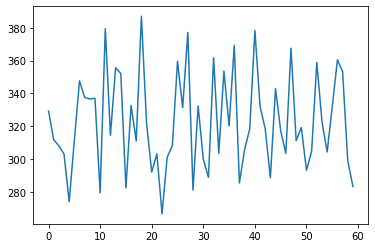

In [11]:
plt.plot(np.array(test_labels))

In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [B441PV_var]')
  plt.ylim([0, 50])
  plt.legend()
  plt.grid(True)

In [15]:
# Linear Regression
# Lets train a linear model based only on one variable (C1)
# Normalization layer
c1 = np.array(train_features['C1'])
c1_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
c1_normalizer.adapt(c1)
print(c1_normalizer.mean.numpy())
print(c1_normalizer.variance.numpy())

first = np.array(c1[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print('Normalized:', c1_normalizer(first).numpy())

[0.604215]
[0.0002282]
First example: [0.61]
Normalized: [0.45]


In [16]:
# Build keras sequential model
c1_model = tf.keras.Sequential([
    c1_normalizer,
    layers.Dense(units=1)
])

c1_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [17]:
# Configure the training of the model
c1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error',
    metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [18]:
%%time
# Execute the training
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=50)
history = c1_model.fit(
    train_features['C1'], train_labels,
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,
    callbacks=[early_stop])

CPU times: user 3.89 s, sys: 355 ms, total: 4.24 s
Wall time: 3.58 s


In [19]:
# Get the training process numbers
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error,epoch
167,26.557192,1036.656616,8.299038,26.320669,1045.703613,8.518023,167
168,26.563513,1037.306030,8.300924,26.300957,1044.807007,8.510394,168
169,26.557564,1036.694824,8.298917,26.295479,1044.562378,8.508366,169
170,26.556845,1036.839844,8.299381,26.320726,1045.700195,8.518113,170
171,26.565954,1036.886230,8.302929,26.345358,1046.884033,8.527542,171


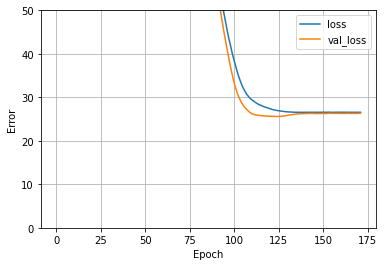

In [21]:
plot_loss(history)

In [23]:
# Evaluate using the test dataset
test_results = {}

test_results['c1_model'] = c1_model.evaluate(
    test_features['C1'],
    test_labels, verbose=0)
test_results

{'c1_model': [25.274614334106445, 884.09375, 7.893102169036865]}

In [24]:
# make predictions using the trained model
x = tf.linspace(0.0, 1, 251)
y = c1_model.predict(x)

In [25]:
# function to compare predictions vs data of training dataset
def plot_c1(x, y):
  plt.scatter(train_features['C1'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('C1')
  plt.ylabel(output)
  plt.legend()

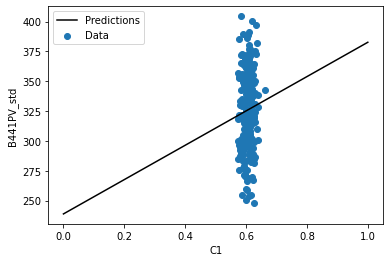

In [26]:
plot_c1(x,y)

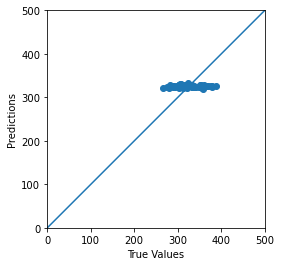

In [27]:
# Predictions vs labels using test dataset
test_predictions_c1_model = c1_model.predict(test_features[['C1']]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_c1_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

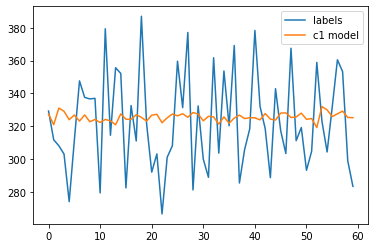

In [28]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_c1_model), label='c1 model')
plt.legend()

In [39]:
# Now let's use a DNN
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='tanh'),
      layers.Dense(64, activation='tanh'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01),
               metrics=['mean_squared_error', 'mean_absolute_percentage_error'])
  return model

In [40]:
normalizer_array = np.array(train_features)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(normalizer_array))
print(normalizer.mean.numpy())

[[0.604215   0.69169444 0.44734737 0.63315266 0.6819711  0.26310045
  0.21579131 0.34841755]]


In [41]:
# Now lets do the full model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [42]:
%%time
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=400)
history = dnn_model.fit(
    normalizer_array, train_labels,
    validation_split=0.2,
    verbose=0, epochs=10000,
    callbacks=[early_stop])

CPU times: user 14.8 s, sys: 1.65 s, total: 16.4 s
Wall time: 12.1 s


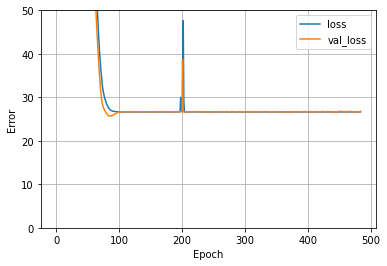

In [43]:
plot_loss(history)

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error,epoch
480,26.639299,1039.373413,8.339571,26.652945,1066.371826,8.646544,480
481,26.650663,1040.284058,8.338554,26.611059,1064.230835,8.629265,481
482,26.640818,1039.513428,8.336349,26.655615,1066.510376,8.647645,482
483,26.639549,1039.496460,8.339541,26.683966,1067.993774,8.659341,483
484,26.647148,1039.912109,8.348489,26.766058,1072.434204,8.693207,484


In [45]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, 
                                               test_labels, verbose=0)
test_results

{'c1_model': [25.274614334106445, 884.09375, 7.893102169036865],
 'dnn_model': [25.18315887451172, 879.5599975585938, 7.899257183074951]}

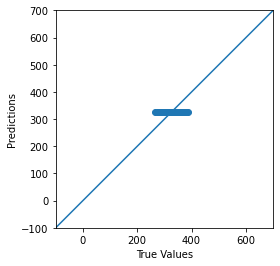

In [46]:
test_predictions_dnn_model = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_dnn_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-100, 700]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

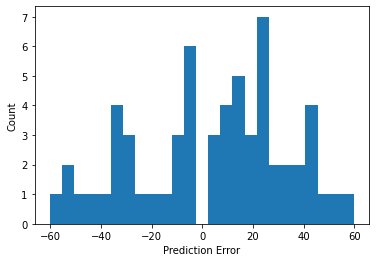

In [47]:
error = test_predictions_dnn_model - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

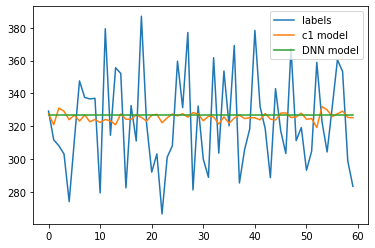

In [49]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_c1_model), label='c1 model')
plt.plot(np.array(test_predictions_dnn_model), label='DNN model')
plt.legend()